### Here we have email spam data and this data is not single text data in column in column there are complete sentence in text so we will perform bag of words for this  

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score , roc_curve

#### Import data

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\8th July 2024\\SPAM_text_message.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Preprocessing

#### In NLP , text contains no missing values but this tabular data and we will perform ML model on it so we will go by ML procedure

#### 1.Handling Missing values

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

#### Here both variable contains object data so there is no make sense to check outliers and Scaling

#### so we directly jump on Data Balancing

In [6]:
df['Category'].value_counts()  / len(df)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

#### We noticed data is highly imbalance

In [7]:
minority_class = len(df[df['Category']=='spam'])
majority_class = len(df[df['Category']=='ham'])

In [8]:
print(minority_class)
print(majority_class)

747
4825


In [9]:
def Data_balance_check(minority_class , majority_class):
    
    if minority_class * 2 < majority_class:
        
        print('Data is Imabalance')
        
    else:
        
        print('Data is Balance')
    
Data_balance_check(minority_class , majority_class)

Data is Imabalance


#### Here we are not use any kind of oversampling technique or SMOTE technique we doing manually data balance .we will increase count of minority class equal to majority class means we increase duplications in minority class

##### in the context of spam detection with a dataset where each entry contains a full sentence in the "message" column, it's not typical to use standard data balancing techniques like oversampling or SMOTE

##### traditional data balancing techniques like oversampling or SMOTE may not be the best choice for spam detection due to the nature

##### First we split the categories of spam detection data

In [10]:
spam = df[df['Category'] == 'spam']
ham = df[df['Category'] == 'ham']

In [11]:
spam.head(2)

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [12]:
ham.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [13]:
print('Shape of spam is :' , spam.shape)
print('Shape of ham is :' , ham.shape)

Shape of spam is : (747, 2)
Shape of ham is : (4825, 2)


##### We increase count in spam equal to ham

In [14]:
ham.shape

(4825, 2)

In [15]:
ham.shape[0]  # here we just access 0th index of shape means we want 4825 value for 
              #increasing count equal to it

4825

In [16]:
spam = spam.sample(ham.shape[0] , replace = True)

In [17]:
spam.shape

(4825, 2)

##### Here we increased count equal to ham by just pass count of records of ham

In [18]:
print(spam.shape , ham.shape)

(4825, 2) (4825, 2)


#### We concate it

In [19]:
df = pd.concat([spam , ham] , axis = 0 , ignore_index = True)

In [20]:
df.shape

(9650, 2)

In [21]:
df.head()

,Category,Message
0,spam,RT-KIng Pro Video Club>> Need help? info@ringt...
1,spam,REMINDER FROM O2: To get 2.50 pounds free call...
2,spam,Urgent! call 09066350750 from your landline. Y...
3,spam,"SMS. ac sun0819 posts HELLO:""You seem cool, wa..."
4,spam,We tried to contact you re your reply to our o...


In [22]:
df['Category'].value_counts()

spam    4825
ham     4825
Name: Category, dtype: int64

In [45]:
x = df['Message']
y = df['Category']

In [46]:
x.head(2)

0    RT-KIng Pro Video Club>> Need help? info@ringt...
1    REMINDER FROM O2: To get 2.50 pounds free call...
Name: Message, dtype: object

In [47]:
y.head(2)

0    spam
1    spam
Name: Category, dtype: object

#### split the data into train and test

In [48]:
x_train , x_test , y_train  , y_test = train_test_split(x, y , test_size = 0.25 ,random_state = 23  , stratify = y)

In [49]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(7237,) (2413,) (7237,) (2413,)


##### Here we perform together bag of words (binary) for text to vector means text to numeric and  Building Model . means here we create one pipeline

In [50]:
pipeline = Pipeline([("BOW" , CountVectorizer()) , ("RandomForest" , RandomForestClassifier())])

In [51]:
pipeline

Pipeline(steps=[('BOW', CountVectorizer()),
                ('RandomForest', RandomForestClassifier())])

#### Here we are performing together means we create pipeline here. so we don't need explicitely perform bag of words and then build model so here we can directly pass raw data to model then it will predict it

#### First data goes to bag of words then it convert  from text into vector(number) then that data goes to model and model get built like this pipeline get works
#### Here we not seperately performing bag of words

#### Train the model

In [52]:
pipeline.fit(x_train ,y_train)

Pipeline(steps=[('BOW', CountVectorizer()),
                ('RandomForest', RandomForestClassifier())])

##### Training prediction

In [53]:
y_train_pred_pipeline = pipeline.predict(x_train)

In [54]:
y_train_pred_pipeline

array(['spam', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

##### Testing prediction of validation data

In [55]:
y_test_pred_pipeline = pipeline.predict(x_test)

In [56]:
y_test_pred_pipeline

array(['ham', 'ham', 'spam', ..., 'spam', 'spam', 'spam'], dtype=object)

##### Preformance Metrics

#### Training Accuracy

In [57]:
training_accuracy_pipeline = accuracy_score(y_train, y_train_pred_pipeline)

In [58]:
training_accuracy_pipeline

1.0

##### Model get overfitted . may be data is less

#### Testing Prediction

In [59]:
testing_accuracy_pipeline= accuracy_score(y_test , y_test_pred_pipeline)

In [60]:
testing_accuracy_pipeline

1.0

##### Confusion matrix

In [61]:
print('confusion matrix of training :')
print(confusion_matrix(y_train , y_train_pred_pipeline))
print('*****'*20)
print(confusion_matrix(y_test ,y_test_pred_pipeline))

confusion matrix of training :
[[3619    0]
 [   0 3618]]
****************************************************************************************************
[[1206    0]
 [   0 1207]]


##### Classification report

In [62]:
print('Training Classification report')
print(classification_report(y_train , y_train_pred_pipeline))
print('****'* 20)
print(classification_report(y_test , y_test_pred_pipeline))

Training Classification report
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3619
        spam       1.00      1.00      1.00      3618

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237

********************************************************************************
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1206
        spam       1.00      1.00      1.00      1207

    accuracy                           1.00      2413
   macro avg       1.00      1.00      1.00      2413
weighted avg       1.00      1.00      1.00      2413



#### Training accuracy is 100 so micro avg is also 100

##### We validate the model by some external data

In [64]:
test1 =["Hello, Hope you all are doing well."]
test2 = ["Hi, hope you all are enjoying with NLP session"]
test3 = ["Congratulations, you won a lottery ticket worth $100 millions ! To claim call @111111 and also share your account details so the we can do smooth traction."]

In [65]:
print(pipeline.predict(test1))
print()
print(pipeline.predict(test2))
print()
print(pipeline.predict(test3))

['ham']

['ham']

['spam']


### XGBOOST

In [48]:
xgb = XGBClassifier()

In [49]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Here first we need to encode , target variable lastly we use randomforest so randomforest having facility if explicitely target variable is not encoded then it handle implicitely but xgboost not

In [66]:
df_category = pd.DataFrame(df['Category'])

In [67]:
df_category.head(2) 

,Category
0,spam
1,spam


### We just manually enocde the spam and ham

In [68]:
df_category[df['Category'] == 'spam'] = 0
df_category[df['Category'] == 'ham'] = 1

#### We check categories count

In [69]:
df_category.value_counts()

Category
0           4825
1           4825
dtype: int64

In [71]:
x

0       RT-KIng Pro Video Club>> Need help? info@ringt...
1       REMINDER FROM O2: To get 2.50 pounds free call...
2       Urgent! call 09066350750 from your landline. Y...
3       SMS. ac sun0819 posts HELLO:"You seem cool, wa...
4       We tried to contact you re your reply to our o...
                              ...                        
9645                                         Huh y lei...
9646                 Will ü b going to esplanade fr home?
9647    Pity, * was in mood for that. So...any other s...
9648    The guy did some bitching but I acted like i'd...
9649                           Rofl. Its true to its name
Name: Message, Length: 9650, dtype: object

In [72]:
df_category.head(2)

,Category
0,0
1,0


In [74]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  9650 non-null   object
dtypes: object(1)
memory usage: 75.5+ KB


In [75]:
df_category = df_category.astype('int64')

In [76]:
df_category

,Category
0,0
1,0
2,0
3,0
4,0
...,...
9645,1
9646,1
9647,1
9648,1


In [77]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  9650 non-null   int64
dtypes: int64(1)
memory usage: 75.5 KB


#### We split data into train and split

In [78]:
x_train , x_test , y_train, y_test = train_test_split(x , df_category , test_size = 0.25 , random_state = 123 , stratify = df_category)

In [79]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(7237,) (2413,) (7237, 1) (2413, 1)


#### Here we will create another pipeline where we perform bag of words and xgbclassifier together

#### Creating a pipeline

In [80]:
from sklearn.pipeline import Pipeline

In [82]:
xgb_pipeline = Pipeline([('BOW' , CountVectorizer()) , ('XGB', XGBClassifier())])

In [104]:
xgb_pipeline

Pipeline(steps=[('BOW', CountVectorizer()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### First data goes to bag of words then it convert  from text into vector(number) then that data goes to model and model get built like this pipeline get works.
#### Here we not seperately performing bag of words

#### Train the pipeline with data

In [85]:
xgb_pipeline.fit(x_train , y_train)

Pipeline(steps=[('BOW', CountVectorizer()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Training Prediction

In [86]:
y_train_pred_xgb = xgb_pipeline.predict(x_train)

In [87]:
print(y_train_pred_xgb)

[0 0 0 ... 0 1 0]


### Testing Prediction

In [88]:
y_test_pred_xgb = xgb_pipeline.predict(x_test)

In [89]:
y_test_pred_xgb

array([1, 1, 0, ..., 1, 0, 0])

#### Accuracy score

In [90]:
Training_accuracy_xgb = accuracy_score(y_train , y_train_pred_xgb)

In [91]:
Training_accuracy_xgb

0.996821887522454

In [92]:
Testing_accuracy_xgb = accuracy_score(y_test , y_test_pred_xgb)

In [93]:
Testing_accuracy_xgb

0.9946125155408205

In [94]:
print('Training Accuracy of XGBClassifier:' , Training_accuracy_xgb)
print('Testing Accuracy of XGBClassifier :' , Testing_accuracy_xgb)

Training Accuracy of XGBClassifier: 0.996821887522454
Testing Accuracy of XGBClassifier : 0.9946125155408205


### Confusion Matrix

In [95]:
print(confusion_matrix(y_train , y_train_pred_xgb))

[[3603   15]
 [   8 3611]]


#### Here 15(FN)(Type II Error) and 8(FP)(Type I Error) (misslcassification) and 3603(TP) and 3611(TN)

In [96]:
print(confusion_matrix(y_test , y_test_pred_xgb))

[[1200    7]
 [   6 1200]]


##### Here 7(FN) and 6(FP) and 120(TP) and 1200(TN)

#### Classification Report

In [97]:
print(classification_report(y_train , y_train_pred_xgb))
print('*****'*20)
print(classification_report(y_test , y_test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618
           1       1.00      1.00      1.00      3619

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237

****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1207
           1       0.99      1.00      0.99      1206

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413



#### ROC AUC SCore and Curve

In [98]:
roc_auc_score(y_train, y_train_pred_xgb)

0.9968217538080987

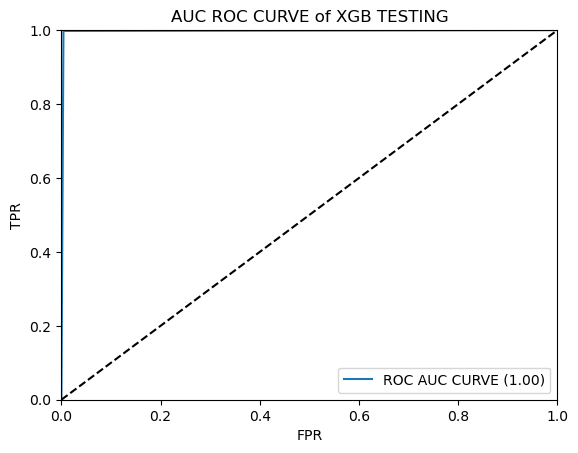

In [99]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred_xgb)

#ROC CURVE
plt.plot(fpr , tpr , label = 'ROC AUC CURVE (%1.2f)'%roc_auc_score(y_train, y_train_pred_xgb))

#AUC CURVE
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0  , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE of XGB TESTING')
plt.legend(loc = 'lower right')
plt.show()

#### Testing ROC AUC Curve

0.9946126863610696


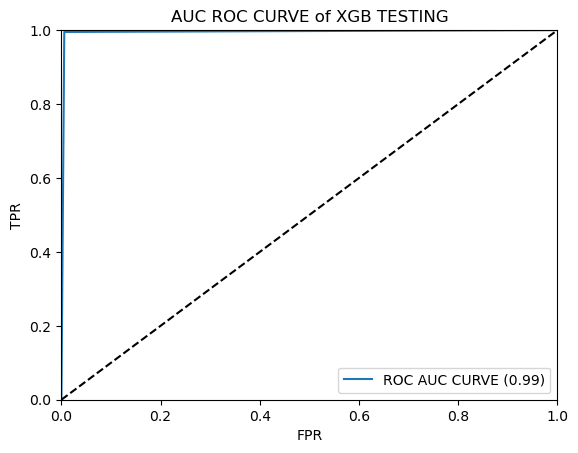

In [100]:
print(roc_auc_score(y_test , y_test_pred_xgb))
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_xgb)

#ROC CURVE
plt.plot(fpr , tpr , label = 'ROC AUC CURVE (%1.2f)'%roc_auc_score(y_test , y_test_pred_xgb))

#AUC CURVE
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0  , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE of XGB TESTING')
plt.legend(loc = 'lower right')
plt.show()

#### XGBOOST is perform best than randomforest in spam detection case

#### We validate the pipeline by some external

In [101]:
test1 =["Hello, Hope you all are doing well."]
test2 = ["Hi, hope you all are enjoying with NLP session"]
test3 = ["Congratulations, you won a lottery ticket worth $100 millions ! To claim call @111111 and also share your account details so the we can do smooth traction."]

In [103]:
print(xgb_pipeline.predict(test1))
print()
print(xgb_pipeline.predict(test2))
print()
print(xgb_pipeline.predict(test3))
print()

[1]

[1]

[0]



#### 1 is ham and 0 is spam

#### xgboost pipeline is the best as compare to randomforest pipeline